In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры Парето
alpha, xm = 2.1, 5


# 1. R(t)
def R(t):
    return 1 if t < xm else (xm / t) ** alpha


# 2. MTTF
MTTF = alpha * xm / (alpha - 1) if alpha > 1 else np.inf

# 3. Дисперсия и СКО
var = xm**2 * alpha / ((alpha - 1) ** 2 * (alpha - 2)) if alpha > 2 else np.inf
std = np.sqrt(var)


# 4. λ(t)
def lamb(t):
    return 0 if t < xm else alpha / t


# 5. f(t)
def f(t):
    return 0 if t < xm else alpha * xm**alpha / t ** (alpha + 1)


# 6. t_γ
def t_gamma(gamma):
    if gamma == 0:
        return np.inf
    if gamma == 100:
        return xm
    return xm / ((gamma / 100) ** (1 / alpha))


# Вывод результатов
print(f"MTTF = {MTTF:.2f} ч")
print(f"СКО = {std:.2f} ч")
print("t_γ: ", [f"{t_gamma(g):.1f}" for g in [0, 50, 90, 100]])

# Графики
t = np.linspace(0, 50, 500)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(t, [R(x) for x in t])
axes[0, 0].set_title("R(t)")
axes[0, 1].plot(t, [f(x) for x in t])
axes[0, 1].set_title("f(t)")
axes[1, 0].plot(t, [lamb(x) for x in t])
axes[1, 0].set_title("λ(t)")

gamma_range = np.arange(0, 101, 5)
t_g = [t_gamma(g) for g in gamma_range]
axes[1, 1].plot(gamma_range, t_g)
axes[1, 1].set_title("t_γ")

plt.tight_layout()
plt.show()

**TN, усеченное нормальное распределение**

In [ ]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

# Параметры
mu, sigma2 = 400, 9095
sigma = np.sqrt(sigma2)
a, b = 0, np.inf

tn = truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)


# 1. R(t)
def R(t):
    return 1 - tn.cdf(t)


# 2. MTTF
MTTF = tn.mean()

# 3. Дисперсия и СКО
var = tn.var()
std = np.sqrt(var)


# 4. λ(t)
def lamb(t):
    return tn.pdf(t) / R(t) if R(t) > 1e-12 else np.inf


# 5. f(t)
def f(t):
    return tn.pdf(t)


# 6. t_γ
def t_gamma(gamma):
    return tn.ppf(gamma / 100) if 0 < gamma < 100 else (np.inf if gamma == 0 else 0)


# Результаты
print(f"Ожидание = {MTTF:.1f} ч")
print(f"СКО = {std:.1f} ч")
print(f"t_50 = {t_gamma(50):.1f} ч")
print(f"t_10 = {t_gamma(10):.1f} ч")

# Графики
t = np.linspace(0, 800, 500)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(t, [R(x) for x in t])
axes[0, 0].set_title("R(t)")
axes[0, 1].plot(t, [f(x) for x in t])
axes[0, 1].set_title("f(t)")
axes[1, 0].plot(t, [lamb(x) for x in t])
axes[1, 0].set_title("λ(t)")

gamma_range = np.arange(0, 101, 10)
t_g = [t_gamma(g) for g in gamma_range]
axes[1, 1].plot(gamma_range, t_g)
axes[1, 1].set_title("t_γ")

plt.tight_layout()
plt.show()

**Система из 3 элементов целиком**

MTTF системы = 12.75 ч
Дисперсия = 41.50
СКО = 6.44
Гамма-процентная наработка:
γ=0% → t_γ = inf ч
γ=10% → t_γ = 14.96 ч
γ=20% → t_γ = 10.75 ч
γ=30% → t_γ = 8.87 ч
γ=40% → t_γ = 7.73 ч
γ=50% → t_γ = 6.95 ч
γ=60% → t_γ = 6.37 ч
γ=70% → t_γ = 5.92 ч
γ=80% → t_γ = 5.56 ч
γ=90% → t_γ = 5.26 ч
γ=100% → t_γ = 0.00 ч


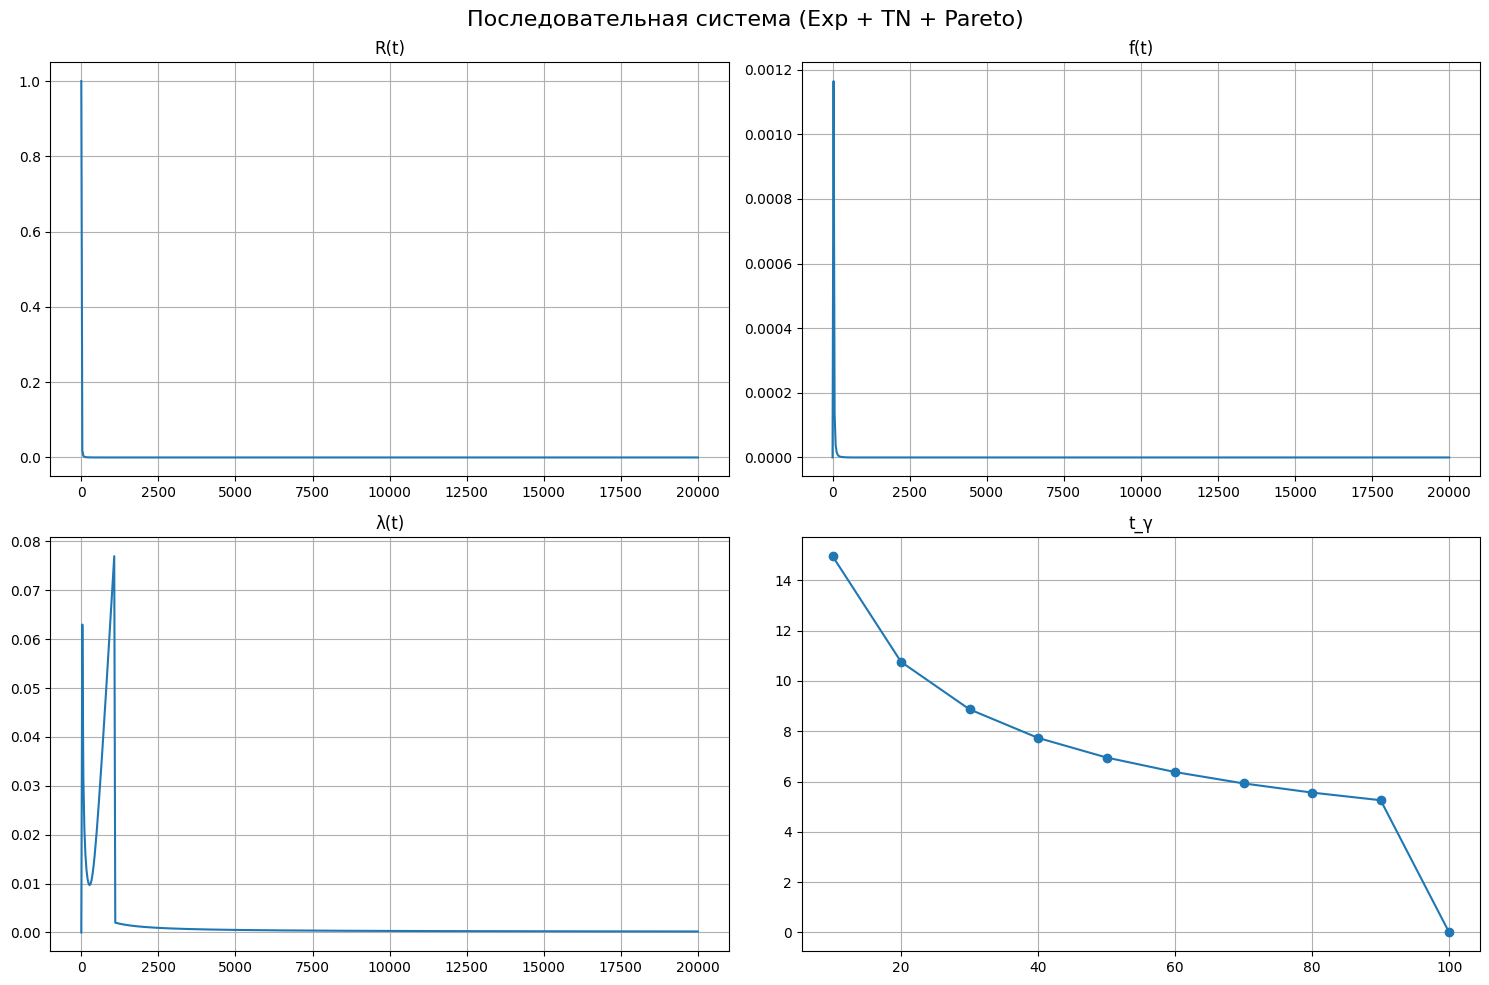

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy import optimize

# ===============================
# ПАРАМЕТРЫ ЭЛЕМЕНТОВ
# ===============================

# 1. Экспоненциальное
lam = 1e-4

# 2. Усечённое нормальное
mu = 400
sigma2 = 9095
sigma = np.sqrt(sigma2)
tn = truncnorm((0 - mu) / sigma, np.inf, loc=mu, scale=sigma)

# 3. Парето
alpha = 2.1
xm = 5


# ===============================
# PDF элементов
# ===============================


def exp_pdf(t):
    return lam * np.exp(-lam * t) if t > 0 else 0


def tn_pdf(t):
    return tn.pdf(t) if t > 0 else 0


def pareto_pdf(t):
    return alpha * xm**alpha / t ** (alpha + 1) if t >= xm else 0


# ===============================
# CDF элементов
# ===============================


def exp_cdf(t):
    return 1 - np.exp(-lam * t) if t > 0 else 0


def tn_cdf(t):
    return tn.cdf(t) if t > 0 else 0


def pareto_cdf(t):
    return 1 - (xm / t) ** alpha if t >= xm else 0


# ===============================
# НАДЁЖНОСТЬ элементов
# ===============================


def exp_R(t):
    return np.exp(-lam * t)


def tn_R(t):
    return 1 - tn_cdf(t)


def pareto_R(t):
    return 1 if t < xm else (xm / t) ** alpha


# ===============================
# ИНТЕНСИВНОСТИ элементов
# ===============================


def exp_lambda(t):
    return lam if t > 0 else 0


def tn_lambda(t):
    r = tn_R(t)
    return tn_pdf(t) / r if r > 1e-12 else 0


def pareto_lambda(t):
    return alpha / t if t >= xm else 0

def system_reliability(t):
    return exp_R(t) * tn_R(t) * pareto_R(t)


def system_cdf(t):
    return 1 - system_reliability(t)


def system_pdf(t):
    if t <= 0:
        return 0
    return (
        exp_pdf(t) * tn_R(t) * pareto_R(t)
        + tn_pdf(t) * exp_R(t) * pareto_R(t)
        + pareto_pdf(t) * exp_R(t) * tn_R(t)
    )


def system_failure_rate(t):
    return exp_lambda(t) + tn_lambda(t) + pareto_lambda(t)


def system_mean_time(n=10000):
    t_max = 50000
    step = t_max / n
    integral = 0

    for i in range(n):
        t = i * step
        integral += system_reliability(t)

    return integral * step


def system_variance(m, n=10000):
    t_max = 50000
    step = t_max / n
    integral = 0

    for i in range(n):
        t = i * step
        integral += t * system_reliability(t)

    e_t2 = 2 * integral * step
    return e_t2 - m**2


def system_gamma_percent(gamma_percent):
    if gamma_percent <= 0:
        return np.inf
    if gamma_percent >= 100:
        return 0

    def eq(t):
        return system_reliability(t) - gamma_percent / 100

    sol = optimize.root_scalar(eq, bracket=[0, 50000], method="bisect")
    return sol.root


mean_sys = system_mean_time()
var_sys = system_variance(mean_sys)
std_sys = np.sqrt(var_sys)

print(f"MTTF системы = {mean_sys:.2f} ч")
print(f"Дисперсия = {var_sys:.2f}")
print(f"СКО = {std_sys:.2f}")

print("Гамма-процентная наработка:")
for g in range(0, 101, 10):
    print(f"γ={g}% → t_γ = {system_gamma_percent(g):.2f} ч")


t_values = np.linspace(0, 20000, 600)
gamma_values = np.arange(0, 101, 10)

plt.figure(figsize=(15, 10))
plt.suptitle("Последовательная система (Exp + TN + Pareto)", fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(t_values, [system_reliability(t) for t in t_values])
plt.title("R(t)")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t_values, [system_pdf(t) for t in t_values])
plt.title("f(t)")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t_values, [system_failure_rate(t) for t in t_values])
plt.title("λ(t)")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(gamma_values, [system_gamma_percent(g) for g in gamma_values], marker="o")
plt.title("t_γ")
plt.grid()

plt.tight_layout()
plt.show()